In [1]:
#impoting the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from datetime import datetime
import dateutil.parser
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing the dataset
tesla_df = pd.read_csv('tesla.csv')
tesla_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2015-09-18 00:00:00+00:00,260.62,263.82,257.5000,257.96,3763064,52.124,52.764,51.50000,51.592,18815320,0.0,1.0
1,TSLA,2015-09-21 00:00:00+00:00,264.20,271.57,255.8000,263.98,6120155,52.840,54.314,51.16000,52.796,30600775,0.0,1.0
2,TSLA,2015-09-22 00:00:00+00:00,260.94,262.65,255.8700,259.03,3664353,52.188,52.530,51.17400,51.806,18321765,0.0,1.0
3,TSLA,2015-09-23 00:00:00+00:00,261.06,262.08,257.5838,261.95,2600778,52.212,52.416,51.51676,52.390,13003890,0.0,1.0
4,TSLA,2015-09-24 00:00:00+00:00,263.12,263.45,256.2100,259.53,3448191,52.624,52.690,51.24200,51.906,17240955,0.0,1.0


In [3]:
apple_df = pd.read_csv('apple.csv')
apple_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-09-18 00:00:00+00:00,113.45,114.30,111.8700,112.21,74285291,26.206407,26.402753,25.841435,25.919973,297141164,0.0,1.0
1,AAPL,2015-09-21 00:00:00+00:00,115.21,115.37,113.6600,113.67,50221965,26.612959,26.649918,26.254916,26.257226,200887860,0.0,1.0
2,AAPL,2015-09-22 00:00:00+00:00,113.40,114.18,112.5201,113.38,50346159,26.194857,26.375034,25.991605,26.190238,201384636,0.0,1.0
3,AAPL,2015-09-23 00:00:00+00:00,114.32,114.72,113.3000,113.63,35756716,26.407373,26.499771,26.171758,26.247986,143026864,0.0,1.0
4,AAPL,2015-09-24 00:00:00+00:00,115.00,115.50,112.3700,113.25,50219475,26.564450,26.679947,25.956932,26.160208,200877900,0.0,1.0


In [4]:
google_df = pd.read_csv('google.csv')
google_df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2015-09-18 00:00:00+00:00,629.25,640.00,627.02,636.79,5133386,629.25,640.00,627.02,636.79,5133386,0.0,1.0
1,GOOG,2015-09-21 00:00:00+00:00,635.44,636.49,625.94,634.40,1788506,635.44,636.49,625.94,634.40,1788506,0.0,1.0
2,GOOG,2015-09-22 00:00:00+00:00,622.69,627.55,615.43,627.00,2562869,622.69,627.55,615.43,627.00,2562869,0.0,1.0
3,GOOG,2015-09-23 00:00:00+00:00,622.36,628.93,620.00,622.05,1470949,622.36,628.93,620.00,622.05,1470949,0.0,1.0
4,GOOG,2015-09-24 00:00:00+00:00,625.80,627.32,612.40,616.64,2240098,625.80,627.32,612.40,616.64,2240098,0.0,1.0


## Data-Preprocessing

In [5]:
tesla_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [6]:
tesla_close = tesla_df[['date','open','close','low','high','volume']]
tesla_close.head()

,date,open,close,low,high,volume
0,2015-09-18 00:00:00+00:00,257.96,260.62,257.5000,263.82,3763064
1,2015-09-21 00:00:00+00:00,263.98,264.20,255.8000,271.57,6120155
2,2015-09-22 00:00:00+00:00,259.03,260.94,255.8700,262.65,3664353
3,2015-09-23 00:00:00+00:00,261.95,261.06,257.5838,262.08,2600778
4,2015-09-24 00:00:00+00:00,259.53,263.12,256.2100,263.45,3448191


In [7]:
tesla_close['date'] = tesla_close['date'].apply(lambda x: x.split(' ')[0])
tesla_close['date'] = pd.to_datetime(tesla_close['date'])
tesla_close['date'].head()

0   2015-09-18
1   2015-09-21
2   2015-09-22
3   2015-09-23
4   2015-09-24
Name: date, dtype: datetime64[ns]

In [8]:
tesla_close.set_index('date',inplace=True)

In [9]:
tesla_close.head()

,open,close,low,high,volume
date,,,,,
2015-09-18,257.96,260.62,257.5000,263.82,3763064
2015-09-21,263.98,264.20,255.8000,271.57,6120155
2015-09-22,259.03,260.94,255.8700,262.65,3664353
2015-09-23,261.95,261.06,257.5838,262.08,2600778
2015-09-24,259.53,263.12,256.2100,263.45,3448191


In [10]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [11]:
apple_close = apple_df[['date','open','close','low','high','volume']]
apple_close['date'] = apple_close['date'].apply(lambda x: x.split(' ')[0])
apple_close['date'] = pd.to_datetime(apple_close['date'])
apple_close.set_index('date',inplace=True)

In [12]:
apple_close.head()

,open,close,low,high,volume
date,,,,,
2015-09-18,112.21,113.45,111.8700,114.30,74285291
2015-09-21,113.67,115.21,113.6600,115.37,50221965
2015-09-22,113.38,113.40,112.5201,114.18,50346159
2015-09-23,113.63,114.32,113.3000,114.72,35756716
2015-09-24,113.25,115.00,112.3700,115.50,50219475


In [13]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [14]:
google_close =google_df[['date','open','close','low','high','volume']]
google_close['date'] = google_close['date'].apply(lambda x: x.split(' ')[0])
google_close['date'] = pd.to_datetime(google_close['date'])
google_close.set_index('date',inplace=True)
google_close.head()

,open,close,low,high,volume
date,,,,,
2015-09-18,636.79,629.25,627.02,640.00,5133386
2015-09-21,634.40,635.44,625.94,636.49,1788506
2015-09-22,627.00,622.69,615.43,627.55,2562869
2015-09-23,622.05,622.36,620.00,628.93,1470949
2015-09-24,616.64,625.80,612.40,627.32,2240098


## Data - Exploration

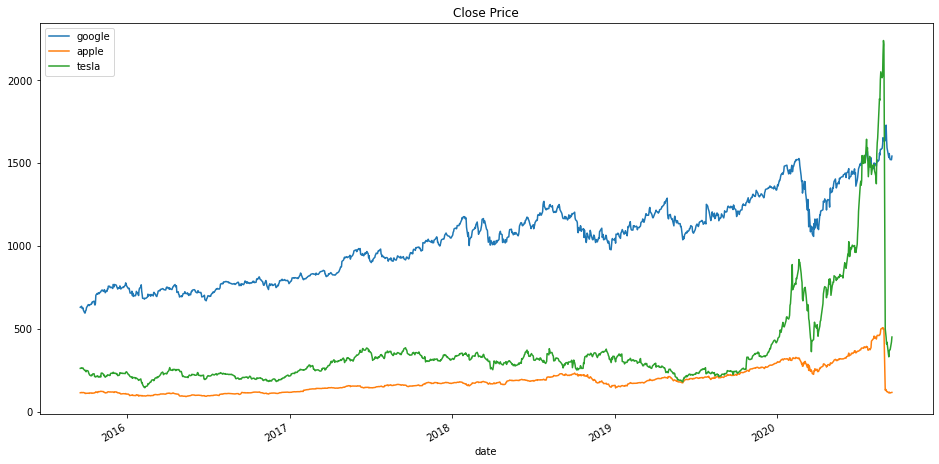

In [15]:
plt.figure(figsize=(16,8))
google_close['close'].plot(label='google',title='Close Price')
apple_close['close'].plot(label ='apple')
tesla_close['close'].plot(label= 'tesla')
plt.legend()

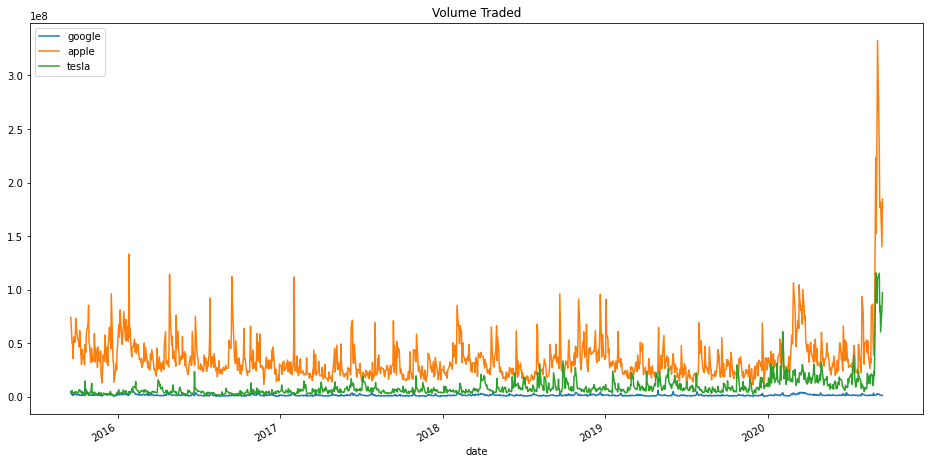

In [16]:
plt.figure(figsize=(16,8))
google_close['volume'].plot(label='google')
apple_close['volume'].plot(label='apple')
tesla_close['volume'].plot(label='tesla', title='Volume Traded')
plt.legend()

In [17]:
apple_close['volume'].idxmax()

Timestamp('2020-09-04 00:00:00')

In [18]:
apple_close.loc['2020-09-04']

open      1.200700e+02
close     1.209600e+02
low       1.108900e+02
high      1.237000e+02
volume    3.326072e+08
Name: 2020-09-04 00:00:00, dtype: float64

#### Create Total Trading

In [19]:
tesla_close['Total Traded'] = tesla_close['open']*tesla_close['volume']
google_close['Total Traded'] = google_close['open']* google_close['volume']
apple_close['Total Traded'] = apple_close['open'] * google_close['volume']

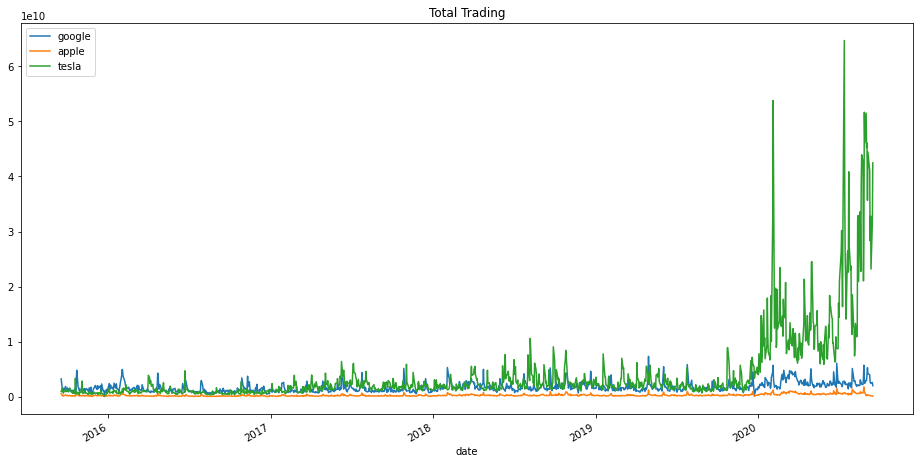

In [20]:
plt.figure(figsize=(16,8))
google_close['Total Traded'].plot(label = 'google',title='Total Trading')
apple_close['Total Traded'].plot(label='apple')
tesla_close['Total Traded'].plot(label='tesla')
plt.legend()

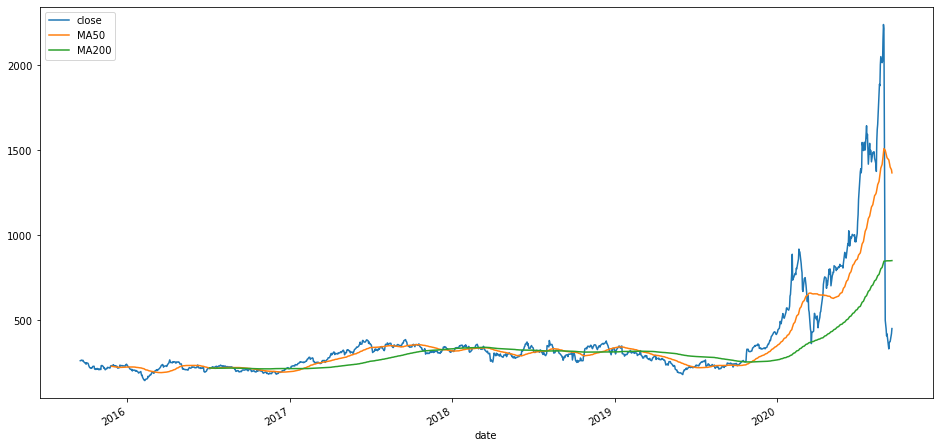

In [21]:
#Creating Moving Average for tesla MA50 And MA200
tesla_close['MA50'] = tesla_close['close'].rolling(50).mean()
tesla_close['MA200'] = tesla_close['close'].rolling(200).mean()
tesla_close[['close','MA50','MA200']].plot(label='Tesla',figsize=(16,8))

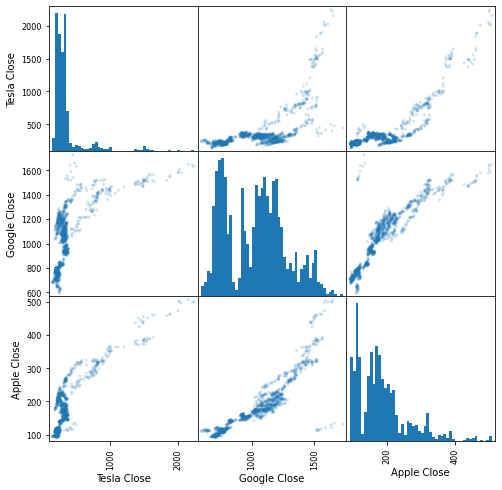

In [22]:
#finding the relation between there stocks
from pandas.plotting import scatter_matrix
scatter_plot = pd.concat([tesla_close['close'],google_close['close'],apple_close['close']],axis=1)
scatter_plot.columns=['Tesla Close','Google Close','Apple Close']
scatter_matrix(scatter_plot,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50})
plt.show()

### Basic Financial Analysis

#### 1.Daily Percentage Change

In [23]:
tesla_close.head()

,open,close,low,high,volume,Total Traded,MA50,MA200
date,,,,,,,,
2015-09-18,257.96,260.62,257.5000,263.82,3763064,9.707200e+08,NaN,NaN
2015-09-21,263.98,264.20,255.8000,271.57,6120155,1.615599e+09,NaN,NaN
2015-09-22,259.03,260.94,255.8700,262.65,3664353,9.491774e+08,NaN,NaN
2015-09-23,261.95,261.06,257.5838,262.08,2600778,6.812738e+08,NaN,NaN
2015-09-24,259.53,263.12,256.2100,263.45,3448191,8.949090e+08,NaN,NaN


In [24]:
# Daily returns of tesla
tesla_close['returns'] = tesla_close['close'].pct_change(1)

In [25]:
tesla_close.head()

,open,close,low,high,volume,Total Traded,MA50,MA200,returns
date,,,,,,,,,
2015-09-18,257.96,260.62,257.5000,263.82,3763064,9.707200e+08,NaN,NaN,NaN
2015-09-21,263.98,264.20,255.8000,271.57,6120155,1.615599e+09,NaN,NaN,0.013736
2015-09-22,259.03,260.94,255.8700,262.65,3664353,9.491774e+08,NaN,NaN,-0.012339
2015-09-23,261.95,261.06,257.5838,262.08,2600778,6.812738e+08,NaN,NaN,0.000460
2015-09-24,259.53,263.12,256.2100,263.45,3448191,8.949090e+08,NaN,NaN,0.007891


In [26]:
#Daily returns for google and apple
apple_close['returns'] = apple_close['close'].pct_change(1)
google_close['returns'] = google_close['close'].pct_change(1)

In [27]:
apple_close.head()

,open,close,low,high,volume,Total Traded,returns
date,,,,,,,
2015-09-18,112.21,113.45,111.8700,114.30,74285291,5.760172e+08,NaN
2015-09-21,113.67,115.21,113.6600,115.37,50221965,2.032995e+08,0.015513
2015-09-22,113.38,113.40,112.5201,114.18,50346159,2.905781e+08,-0.015710
2015-09-23,113.63,114.32,113.3000,114.72,35756716,1.671439e+08,0.008113
2015-09-24,113.25,115.00,112.3700,115.50,50219475,2.536911e+08,0.005948


In [28]:
google_close.head()

,open,close,low,high,volume,Total Traded,returns
date,,,,,,,
2015-09-18,636.79,629.25,627.02,640.00,5133386,3.268889e+09,NaN
2015-09-21,634.40,635.44,625.94,636.49,1788506,1.134628e+09,0.009837
2015-09-22,627.00,622.69,615.43,627.55,2562869,1.606919e+09,-0.020065
2015-09-23,622.05,622.36,620.00,628.93,1470949,9.150038e+08,-0.000530
2015-09-24,616.64,625.80,612.40,627.32,2240098,1.381334e+09,0.005527


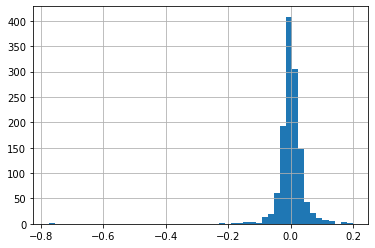

In [29]:
tesla_close['returns'].hist(bins=50)

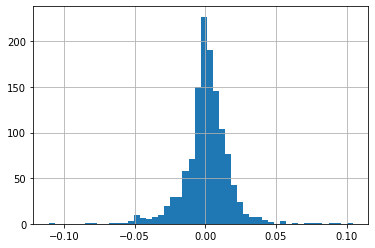

In [30]:
google_close['returns'].hist(bins=50)

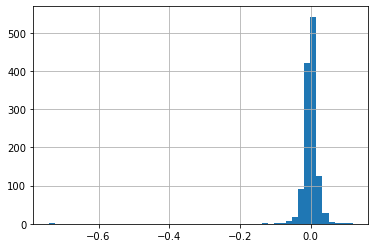

In [31]:
apple_close['returns'].hist(bins=50)

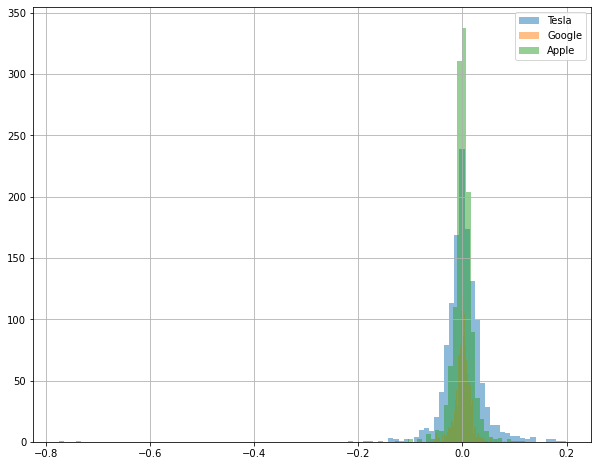

In [32]:
tesla_close['returns'].hist(bins=100,label='Tesla',alpha=0.5,figsize=(10,8))
google_close['returns'].hist(bins=100,label='Google',alpha=0.5)
apple_close['returns'].hist(bins=100,label='Apple',alpha=0.5)
plt.legend()

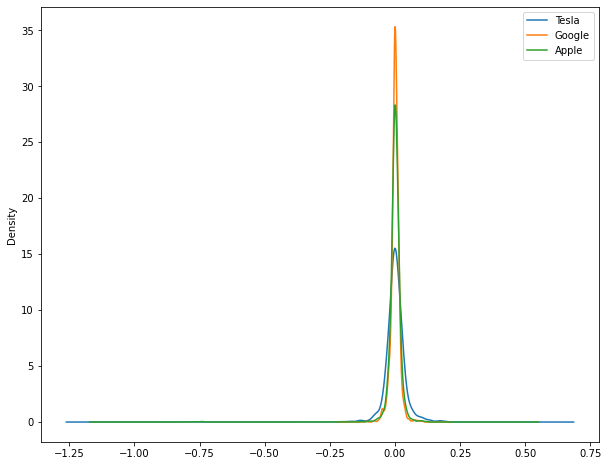

In [33]:
tesla_close['returns'].plot(kind='kde',label='Tesla',figsize=(10,8))
google_close['returns'].plot(kind='kde',label='Google')
apple_close['returns'].plot(kind='kde',label='Apple')
plt.legend()

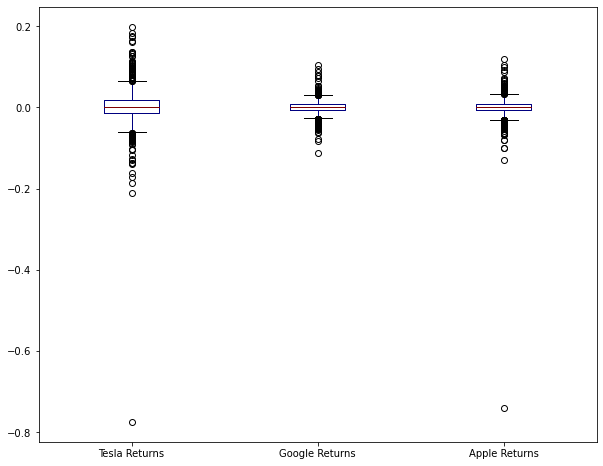

In [34]:
#Creating box plot for comparing the results
box_plot = pd.concat([tesla_close['returns'],google_close['returns'],apple_close['returns']],axis=1)
box_plot.columns = ['Tesla Returns','Google Returns','Apple Returns']
box_plot.plot(kind ='box',figsize=(10,8),colormap='jet')

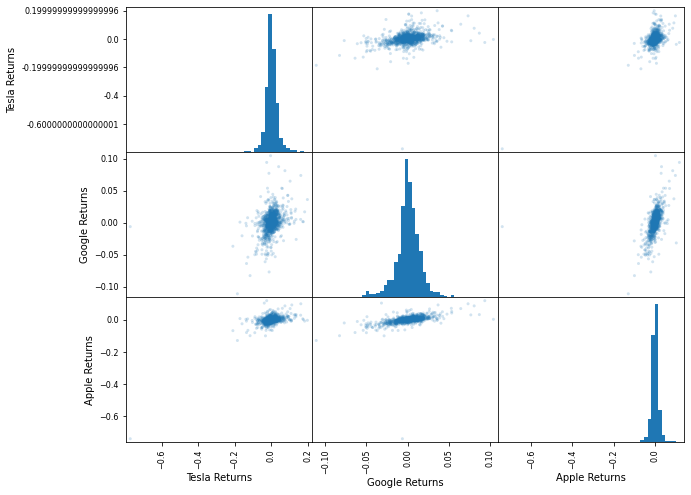

In [35]:
#Comparing the daily returns of all stocks
scatter_matrix(box_plot,figsize=(10,8),alpha=0.2,hist_kwds={'bins':50})
plt.show()

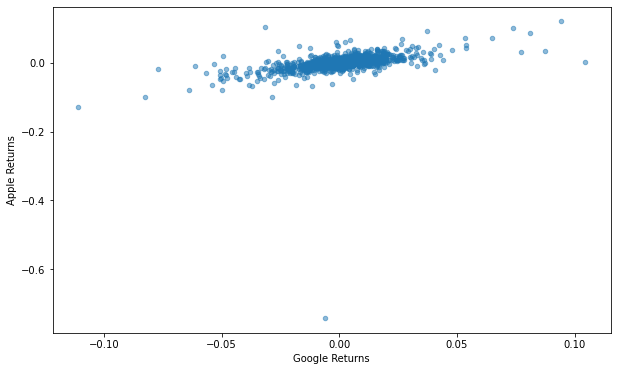

In [36]:
#see relationship between apple and google as showing some linear relationship in above plot
box_plot.plot(kind='scatter',x='Google Returns', y= 'Apple Returns',alpha=0.5,figsize=(10,6))

#### 2.Cumulative Returns
**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

In [37]:
#tesla cumulative returns
tesla_close['Cumulative Return'] = (1 + tesla_close['returns']).cumprod()
tesla_close.head()

,open,close,low,high,volume,Total Traded,MA50,MA200,returns,Cumulative Return
date,,,,,,,,,,
2015-09-18,257.96,260.62,257.5000,263.82,3763064,9.707200e+08,NaN,NaN,NaN,NaN
2015-09-21,263.98,264.20,255.8000,271.57,6120155,1.615599e+09,NaN,NaN,0.013736,1.013736
2015-09-22,259.03,260.94,255.8700,262.65,3664353,9.491774e+08,NaN,NaN,-0.012339,1.001228
2015-09-23,261.95,261.06,257.5838,262.08,2600778,6.812738e+08,NaN,NaN,0.000460,1.001688
2015-09-24,259.53,263.12,256.2100,263.45,3448191,8.949090e+08,NaN,NaN,0.007891,1.009593


In [38]:
#Cumulative returns for google and apple
google_close['Cumulative Returns'] = (1 + google_close['returns']).cumprod()
apple_close['Cumulative Returns'] = (1 + apple_close['returns']).cumprod()

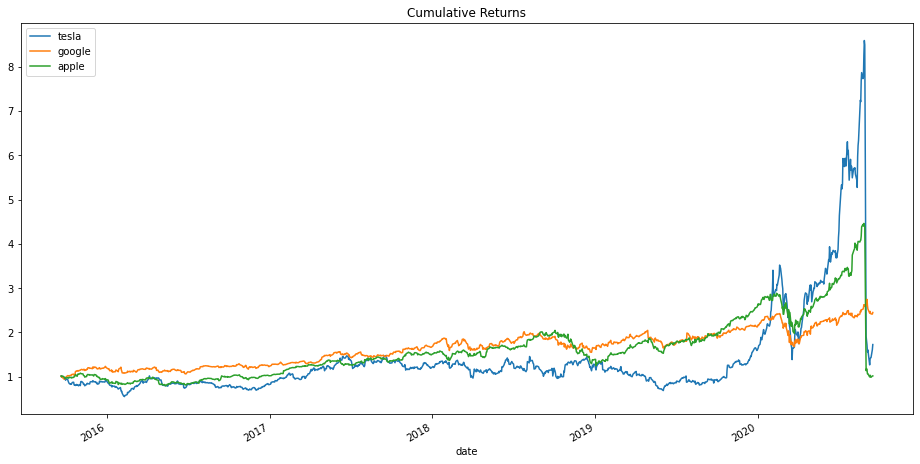

In [39]:
#plotting the cumulative returns
tesla_close['Cumulative Return'].plot(label='tesla',figsize=(16,8),title='Cumulative Returns')
google_close['Cumulative Returns'].plot(label='google')
apple_close['Cumulative Returns'].plot(label='apple')
plt.legend()

### Sharpe Ratio and Portfolio Values
Creating Normed Returns which is same as Cumulative Returns

In [46]:
for stock_df in (tesla_close,google_close,apple_close):
    stock_df['Normed Returns'] = stock_df['close'] / stock_df.iloc[0]['close']

In [47]:
stock_df.head()

,open,close,low,high,volume,Total Traded,returns,Cumulative Returns,Normal Returns,Normed Returns
date,,,,,,,,,,
2015-09-18,112.21,113.45,111.8700,114.30,74285291,5.760172e+08,NaN,NaN,1.000000,1.000000
2015-09-21,113.67,115.21,113.6600,115.37,50221965,2.032995e+08,0.015513,1.015513,1.015513,1.015513
2015-09-22,113.38,113.40,112.5201,114.18,50346159,2.905781e+08,-0.015710,0.999559,0.999559,0.999559
2015-09-23,113.63,114.32,113.3000,114.72,35756716,1.671439e+08,0.008113,1.007669,1.007669,1.007669
2015-09-24,113.25,115.00,112.3700,115.50,50219475,2.536911e+08,0.005948,1.013662,1.013662,1.013662


## Allocations
Let's pretend we had the following allocations for our total portfolio:

*   40% tesla
*   30% google
*   30% apple

In [50]:
for stock_df,alloc in zip([tesla_close,google_close,apple_close],[.4, .3, .3]):
    stock_df['Allocation'] = stock_df['Normed Returns'] * alloc

In [51]:
stock_df.head()

,open,close,low,high,volume,Total Traded,returns,Cumulative Returns,Normal Returns,Normed Returns,Allocation
date,,,,,,,,,,,
2015-09-18,112.21,113.45,111.8700,114.30,74285291,5.760172e+08,NaN,NaN,1.000000,1.000000,0.300000
2015-09-21,113.67,115.21,113.6600,115.37,50221965,2.032995e+08,0.015513,1.015513,1.015513,1.015513,0.304654
2015-09-22,113.38,113.40,112.5201,114.18,50346159,2.905781e+08,-0.015710,0.999559,0.999559,0.999559,0.299868
2015-09-23,113.63,114.32,113.3000,114.72,35756716,1.671439e+08,0.008113,1.007669,1.007669,1.007669,0.302301
2015-09-24,113.25,115.00,112.3700,115.50,50219475,2.536911e+08,0.005948,1.013662,1.013662,1.013662,0.304099


### Investment
lets invest 1 Million $ 

In [52]:
for stock_df in [tesla_close,google_close,apple_close]:
    stock_df['Position Values'] = stock_df['Allocation'] * 1000000

### Total Portfolio Values

In [63]:
portfolio_df =pd.concat([tesla_close['Position Values'],google_close['Position Values'],apple_close['Position Values']],axis=1)

In [64]:
portfolio_df.head()

,Position Values,Position Values,Position Values
date,,,
2015-09-18,400000.000000,300000.000000,300000.000000
2015-09-21,405494.589824,302951.132300,304654.032613
2015-09-22,400491.136521,296872.467223,299867.783164
2015-09-23,400675.312716,296715.137068,302300.572940
2015-09-24,403837.004067,298355.184744,304098.721904


In [65]:
portfolio_df.columns = ['Tesla Pos','Google Pos','Apple Pos']
portfolio_df.head()

,Tesla Pos,Google Pos,Apple Pos
date,,,
2015-09-18,400000.000000,300000.000000,300000.000000
2015-09-21,405494.589824,302951.132300,304654.032613
2015-09-22,400491.136521,296872.467223,299867.783164
2015-09-23,400675.312716,296715.137068,302300.572940
2015-09-24,403837.004067,298355.184744,304098.721904


In [66]:
portfolio_df['Total Pos'] =  portfolio_df.sum(axis=1)
portfolio_df.head()

,Tesla Pos,Google Pos,Apple Pos,Total Pos
date,,,,
2015-09-18,400000.000000,300000.000000,300000.000000,1.000000e+06
2015-09-21,405494.589824,302951.132300,304654.032613,1.013100e+06
2015-09-22,400491.136521,296872.467223,299867.783164,9.972314e+05
2015-09-23,400675.312716,296715.137068,302300.572940,9.996910e+05
2015-09-24,403837.004067,298355.184744,304098.721904,1.006291e+06


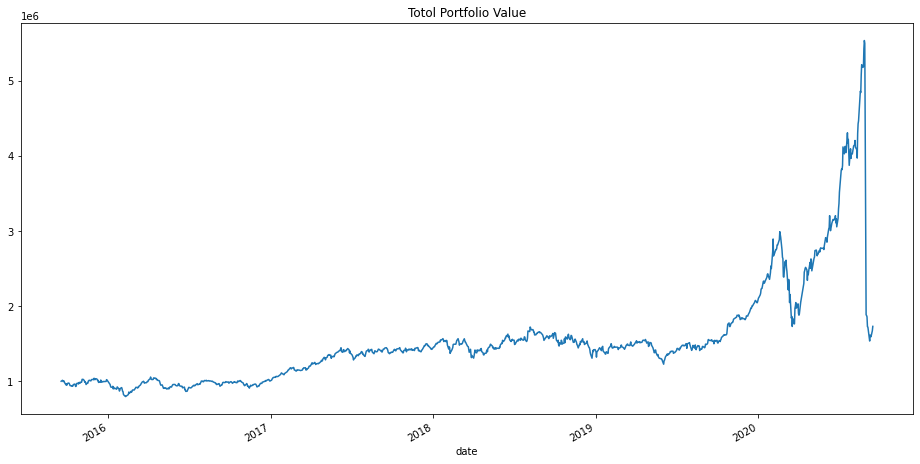

In [68]:
portfolio_df['Total Pos'].plot(figsize=(16,8))
plt.title('Totol Portfolio Value')
plt.show()

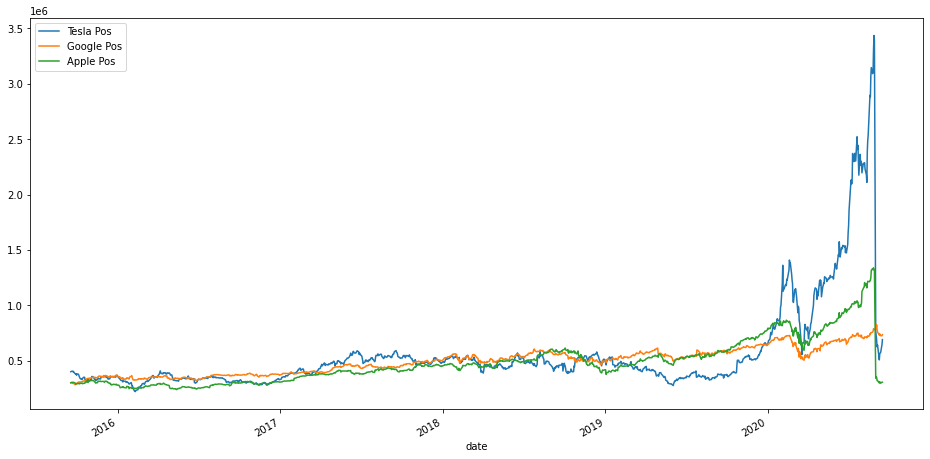

In [69]:
portfolio_df.drop('Total Pos',axis=1).plot(kind='line',figsize=(16,8))

In [70]:
portfolio_df.tail()

,Tesla Pos,Google Pos,Apple Pos,Total Pos
date,,,,
2020-09-09,562167.139897,742293.206198,310233.583076,1.614694e+06
2020-09-10,569933.236129,730402.860548,300105.773468,1.600442e+06
2020-09-11,572051.262374,725015.494636,296165.711767,1.593232e+06
2020-09-14,644033.458675,724328.963051,305037.461437,1.673400e+06
2020-09-15,690292.379710,734893.921335,305526.663729,1.730713e+06


### Portfolio Statistics

#### Daily Returns

In [71]:
portfolio_df['Daily Returns'] = portfolio_df['Tesla Pos'].pct_change(1)

#### Cumulative Returns

In [72]:
cum_ret =100 *(portfolio_df['Total Pos'][-1] / portfolio_df['Total Pos'][0] -1)
print( 'Our returns {} was percent!'.format(cum_ret))

Our returns 73.07129647733596 was percent!


#### Average Daily Returns

In [73]:
portfolio_df['Daily Returns'].mean()

0.0016403078804108021

#### Std Daily Returns

In [74]:
portfolio_df['Daily Returns'].std()

0.041873450666020454

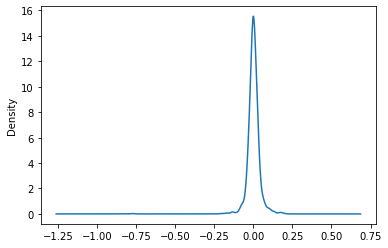

In [75]:
portfolio_df['Daily Returns'].plot(kind='kde')

### Sharp Ratio

In [78]:
SR = portfolio_df['Daily Returns'].mean()/portfolio_df['Daily Returns'].std()
SR

0.03917298083441407

In [79]:
ASR =(252**0.5)*SR
ASR

0.6218517924057546